In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
%matplotlib inline

In [2]:
def PlotHorizontalRoad(ax, x0, y0, segment_len, road_width):
    x, y = np.array([[x0, x0 + segment_len], [y0, y0]])
    line = mlines.Line2D(x, y, lw=1., alpha=0.5)
    ax.add_line(line)

    x, y = np.array([[x0, x0 + segment_len], [y0 + road_width, y0 + road_width]])
    line = mlines.Line2D(x, y, lw=1., alpha=0.5)
    ax.add_line(line)
    
    patches = []
    arrow_len = 0.1
    arrow = mpatches.Arrow(x0 + 0.5 * segment_len - 0.5 * arrow_len, y0 - 0.05, arrow_len, 0.0, width=0.1)    
    patches.append(arrow)    
    arrow = mpatches.Arrow(x0 + 0.5 * segment_len + 0.5 * arrow_len, y0 + road_width + 0.05, -arrow_len, 0.0, width=0.1)
    patches.append(arrow)    
    collection = PatchCollection(patches, alpha=0.3)    
    ax.add_collection(collection)
    
    
def PlotVerticalRoad(ax, x0, y0, segment_len, road_width):
    x, y = np.array([[x0, x0], [y0, y0 + segment_len]])
    line = mlines.Line2D(x, y, lw=1., alpha=0.5)
    ax.add_line(line)

    x, y = np.array([[x0 + road_width, x0 + road_width], [y0, y0 + segment_len]])
    line = mlines.Line2D(x, y, lw=1., alpha=0.5)
    ax.add_line(line)
    
    
    patches = []
    arrow_len = 0.1
    arrow = mpatches.Arrow(x0 + road_width + 0.05, y0 + 0.5 * segment_len - 0.5 * arrow_len, 0.0, arrow_len, width=0.1)    
    patches.append(arrow)    
    arrow = mpatches.Arrow(x0 - 0.05, y0 + 0.5 * segment_len + 0.5 * arrow_len, 0.0, -arrow_len, width=0.1)
    patches.append(arrow)    
    collection = PatchCollection(patches, alpha=0.3)    
    ax.add_collection(collection)    
    
    

def PlotRoadGrid(ax, NW=4, NH=3, segment_len=1.0, road_width=0.1):
    for i in range(NW):
        x0 = (i + 1) * segment_len + i * road_width
        PlotVerticalRoad(ax, x0, 0, segment_len, road_width)
        
    for i in range(NH):
        y0 = (i + 1) * segment_len + i * road_width
        PlotHorizontalRoad(ax, 0, y0, segment_len, road_width)
        
    for i in range(NW):
        for j in range(NH):
            x0 = (i + 1) * segment_len + i * road_width
            y0 = (j + 1) * (segment_len + road_width)
            PlotVerticalRoad(ax, x0, y0, segment_len, road_width)            
                        
            x0 = (i + 1) * (segment_len + road_width)
            y0 = (j + 1) * segment_len + j * road_width
            PlotHorizontalRoad(ax, x0, y0, segment_len, road_width)                        

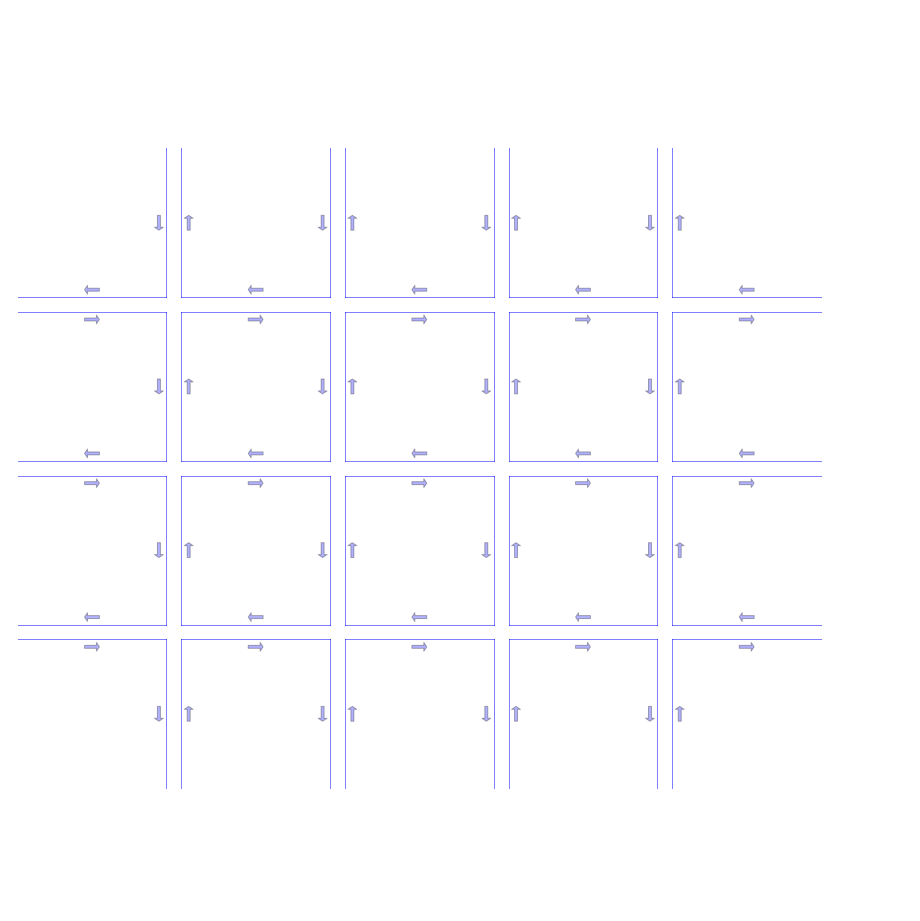

In [3]:
fig = plt.figure(figsize=(16, 16))
ax = plt.gca()
ax.set_axis_bgcolor((1, 1, 1))

PlotRoadGrid(ax)



#plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis('equal')
plt.axis('off')

plt.show()